In [30]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [31]:
%matplotlib inline

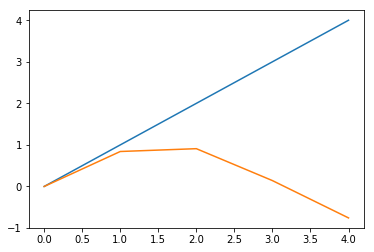

In [32]:
#plotting
x = np.arange(5)
y = np.sin(x)
plt.pyplot.plot(x)
plt.pyplot.plot(x,y)  #Must use matplotlib.pyplot.plot(numpy thing)

In [33]:
#Read in CSV file containing the dataset in a dataframe using Pandas
df = pd.read_csv("C:/Users/Kok/Documents/Loan Prediction/train.csv")

In [34]:
df.head(10) #View the first 10 rows of the dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [35]:
df.describe() #Summary of numerical variables

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


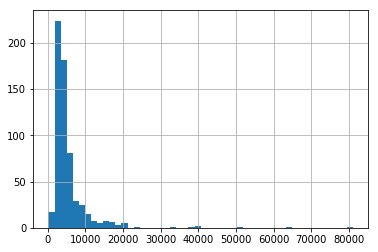

In [36]:
#Create a Histogram to show the distribution of ApplicantIncome, Income is divided into groups (Bins) of 50
df['ApplicantIncome'].hist(bins=50)
#Distribution looks to be right-skewed with some extreme outliers at the top end

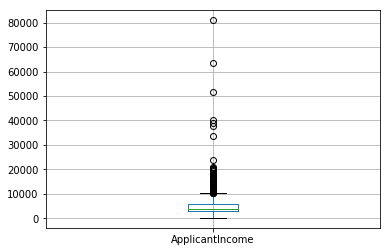

In [37]:
#Boxplot of ApplicantIncome
df.boxplot(column = 'ApplicantIncome')

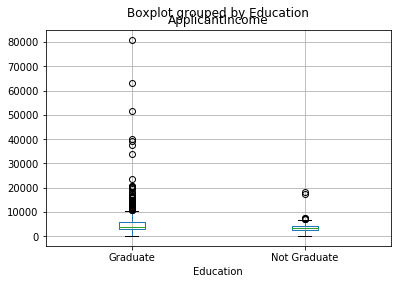

In [38]:
#Boxplot of Application, segregared by Education
df.boxplot(column = 'ApplicantIncome', by='Education')
#Most of the extreme values mentioned earlier come from applicants who are graduates

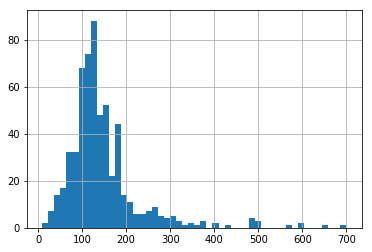

In [39]:
#Historgram of LoanAmount column
df['LoanAmount'].hist(bins=50)
#Still looks right-skewed, with a few outliers at the top end as well

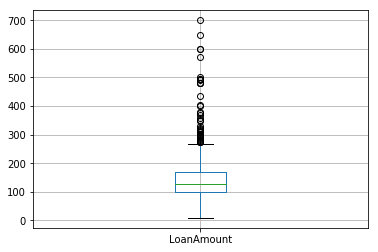

In [40]:
#Boxplot of LoanAmount column
df.boxplot(column = 'LoanAmount')
#We can see the outliers at the top end again

In [42]:
#Getting a pivot table to show the probability of getting a loan based on whether an applicant has a Credit History
temp1 = df['Credit_History'].value_counts(ascending=True)  #Credit History value counts
temp2 = df.pivot_table(values = 'Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
#The above line of code uses the pandas.DataFrame.pivot_table function to set up the relationship between Loan Status 
#Credit History. User defined function to convert 'Y' to 1 and 'N' to 0 and get the mean of that converted values
print ('Frequency Table for Credit History') #Title
print(temp1) #Frequency Table

print('\nProbability of getting a loan for each Credit History Class \n') #Title of Pivot Table
print(temp2)


Frequency Table for Credit History
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probability of getting a loan for each Credit History Class 

                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


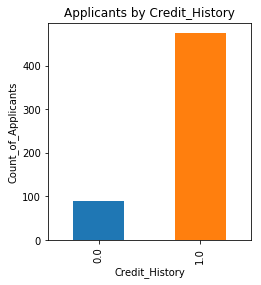

In [45]:
#Plotting Applicant Count by whether they have a Credit History as a bar chart
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))
ax1 =fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count_of_Applicants')
ax1.set_title('Applicants by Credit_History')
temp1.plot(kind='bar')

Text(0.5,0,'Credit_History')

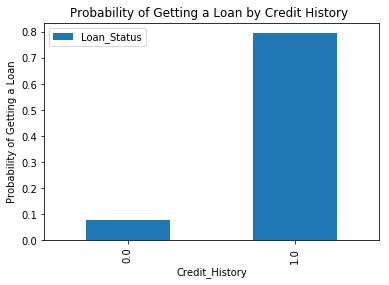

In [44]:
#Plotting the Possibility of Getting a loan based on Credit History 
temp2.plot(kind = 'bar')
plt.ylabel('Probability of Getting a Loan')
plt.title('Probability of Getting a Loan by Credit History ')
plt.xlabel('Credit_History')

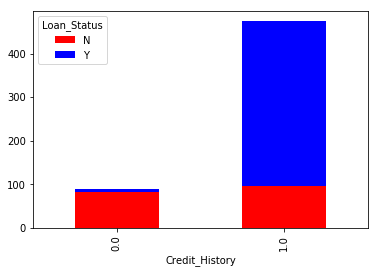

In [46]:
#Creatinng a stacked bar chart to show count of loan status by Credit History
temp3 = pd.crosstab(index=df['Credit_History'],columns=df['Loan_Status'])
temp3.plot(kind='bar',stacked=True,color=['red','blue'],grid=False)

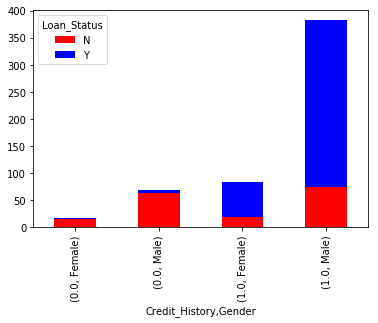

In [47]:
#Creatinng a stacked bar chart to show count of loan status by Credit History and Gender (index uses a list of data series)
temp3 = pd.crosstab(index=[df['Credit_History'],df['Gender']],columns=df['Loan_Status'])
temp3.plot(kind='bar',stacked=True,color=['red','blue'],grid=False)

In [21]:
#Check the number of missing values in the dataset for each column
def num_missing(x):
    '''Function to check whether a field is null'''
    return sum(x.isnull())

#Apply the function to the dataframe
df.apply(num_missing,axis=0)
#So it looks like there are 22 missing values in LoanAmount column

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [22]:
#Another way to apply the function is to define it within the apply method
df.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [23]:
#Filling out the missing Loan Amount values with the mean of the loan amounts
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)

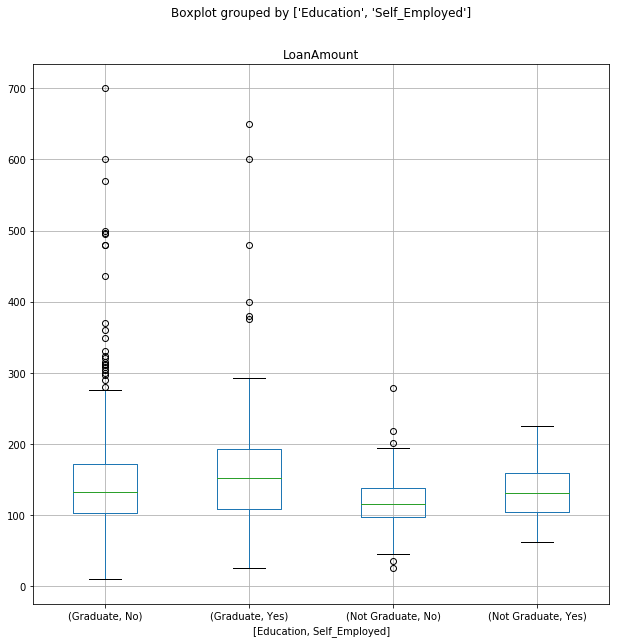

In [24]:
#Boxplot of Application, segregared by Education and whether the applicant is self employed or not
df.boxplot(column = 'LoanAmount', by =['Education','Self_Employed'],figsize=(10,10))

In [6]:
df['Self_Employed'].value_counts()
#Can see most of the values of 'Self_Employed' column are 'No', ie the mode is 'No'

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [7]:
#Fill the values with this line of code
df['Self_Employed'].fillna('No',inplace=True)

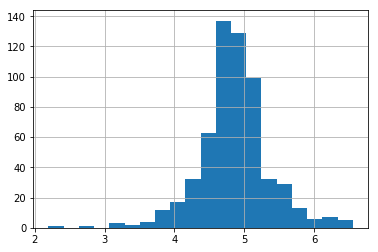

In [5]:
#We see a bunch of extreme values in the Loan Amounts which are technically possible, so instead of treating them like outliers,
#We log transform them to nullify the outlier effect
df['LoanAmount_Log'] = np.log(df['LoanAmount'])  #Creating a new column containing the log-transformed loan amounts
df['LoanAmount_Log'].hist(bins=20)  #Creating the Histogram of LoanAmount_Log

#We see the resulting histogram of log-transformed loan amount is shaped more like a normal distribution with less extreme values

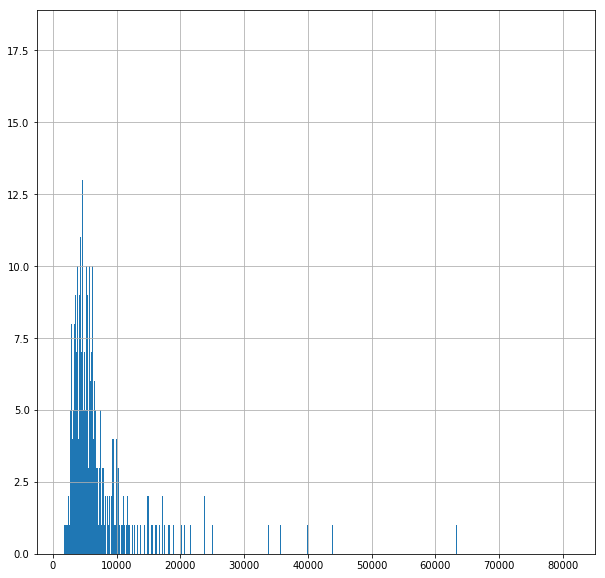

In [16]:
#Summing ApplicantIncome and CoApplicant Income to become a single TotalIncome field
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
#Plotting the histogram of TotalIncome
df['TotalIncome'].hist(bins=1000,figsize=(10,10))

#We see that total income has is right-skewed some extreme values to the top end of the distribution
#So it might be a good idea to log total income like we did for loan amount

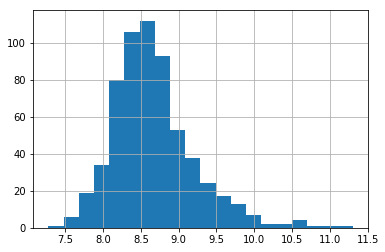

In [17]:
df['TotalIncome_Log'] = np.log(df['TotalIncome'])  #Log-transforming the TotalIncome Column
df['TotalIncome_Log'].hist(bins=20)

In [18]:
df.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_Log       22
TotalIncome           0
TotalIncome_Log       0
dtype: int64

In [19]:
df['Gender'].mode()[0]

'Male'

In [20]:
#Filling the emmpty values of each non-numeric column with the modes of the columns
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

In [21]:
df.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
LoanAmount_Log       22
TotalIncome           0
TotalIncome_Log       0
dtype: int64

In [ ]:
#Next is to build a predictive model in python